# Model Shortlisting Notebook
The purpose of this notebook is exploring the data and testing different models for experimental model exploration. In the flow chart, this notebook goes to step 11 - Shortlisting models 

## Importing Packages

In [1]:
# Imports
import sys
import time
from pathlib import Path
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold


import matplotlib.pyplot as plt
import seaborn as sns

## Setting up for imports of .py modules

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/evangelinekim/Developer/Projects/Roux_Institute/DS5220/DS5220-Supervised-ML-Project


## Importing python modules

In [3]:
import utils.sml_utils as sml_utils
import utils.regression_utils as reg_utils
import utils.all_attr_eda_utils as aae_utils

## Parameters

In [4]:
path_to_data = 'data/winequality-white.csv'
target_attr = 'quality'
test_size = 0.20
train_test_split_random_state = 42
missingness_threshold = 0.20

# step 9
elastic_net_random_state = 42
decision_tree_random_state = 42
random_forest_random_state = 42
gradient_boosting_random_state = 42
target_encoder_random_state = 42

# step 10
scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'max_error', 'r2']
kwargs = {'return_indices': False}  # if true the indices of the cross validation split are returned
max_iter = 10000  # max number of iterations for Lasso, Ridge and ElasticNet - default was 1000
kfold_n_splits = 10  # number of folds in k-fold cv
kfold_shuffle = True
kfold_random_state = 42

## Dataset variables (train/test dataframes were created in previous phases)

In [5]:
train_df = pd.read_csv('data/wine_train_df.csv').copy() # Make copy so original is not affected
train_cap_x_df = train_df.iloc[:, :-1]  # All columns except the last one
train_y_df = train_df.iloc[:, -1].to_frame()

## Set up time

In [6]:
start = time.time()

## Read in data

In [7]:
df = pd.read_csv(path_to_data, sep=";")
print(df.shape)
df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1. Checking missingness (also done in previous phases)

In [8]:
print(df.shape)
df = df.dropna(subset=target_attr)
print(df.shape)

(4898, 12)
(4898, 12)


## 2. Train/Test data split (already done in previous phases)

`wine_train_df` and `wine_test_df` were already created back in phase 1

In [9]:
wine_train_df = pd.read_csv('data/wine_train_df.csv', sep=",")
wine_test_df = pd.read_csv('data/wine_test_df.csv', sep=",")
print(f"wine_train_df shape: {wine_train_df.shape}")
print(f"wine_test_df shape: {wine_test_df.shape}")
del wine_train_df
del wine_test_df

wine_train_df shape: (3918, 12)
wine_test_df shape: (980, 12)


## 3. Train/Validation split

This step will be omitted because cross-validation will be used to select models


## 4. Checking out attribute types (also done in previous phases)

In [10]:
train_cap_x_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

## 5. Identifying attributes with missingness above threshold (also done in previous phases)

In [11]:
train_df.isna().sum() # There are no missing values in the data set.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
return_dict = sml_utils.get_missingness(train_cap_x_df, missingness_threshold)
missingness_drop_list = return_dict['missingness_drop_list']

fixed acidity missingness = 0.0
volatile acidity missingness = 0.0
citric acid missingness = 0.0
residual sugar missingness = 0.0
chlorides missingness = 0.0
free sulfur dioxide missingness = 0.0
total sulfur dioxide missingness = 0.0
density missingness = 0.0
pH missingness = 0.0
sulphates missingness = 0.0
alcohol missingness = 0.0

missingness_drop_list:
[]


## 6. Identifying non machine learning attributes (also done in previous phases)

In [13]:
train_cap_x_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
sml_utils.check_for_complete_unique_attrs(train_cap_x_df)

the data frame has 3918 rows

fixed acidity has 66 unique values and is dtype float64 
volatile acidity has 118 unique values and is dtype float64 
citric acid has 83 unique values and is dtype float64 
residual sugar has 295 unique values and is dtype float64 
chlorides has 147 unique values and is dtype float64 
free sulfur dioxide has 123 unique values and is dtype float64 
total sulfur dioxide has 242 unique values and is dtype float64 
density has 846 unique values and is dtype float64 
pH has 102 unique values and is dtype float64 
sulphates has 74 unique values and is dtype float64 
alcohol has 94 unique values and is dtype float64 


[]

In [15]:
non_ml_attr_list = [] # no non-machine learning attributes were identified

## 7. Looking at attributes to exclude from ML (also done in previous phases)

In [16]:
train_cap_x_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
ml_attr_drop_list = []

No attributes identified to exclude from machine learning (can look back at the eda notebook)

## 8. Establishing ML attribute configuration (also done in previous phases)

In [18]:
ml_ignore_list = missingness_drop_list + non_ml_attr_list + ml_attr_drop_list
ml_ignore_list

[]

In [19]:
train_cap_x_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
# Identifying the remaining numerical attributes to be used

numerical_attr = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]

# Identifying the remaining nominal attributes to be used

nominal_attr = [] 

assert(train_cap_x_df.shape[1] == len(ml_ignore_list) + len(nominal_attr) + len(numerical_attr))

print(f'ml_ignore_list: {ml_ignore_list}')
print(f'\nnumerical_attr: {numerical_attr}')
print(f'nominal_attr: {nominal_attr}')

print(f'\nnumber of machine learning attributes: {len(numerical_attr) + len(nominal_attr)}')
print(f'\nnumerical_attr and nominal_attr: {numerical_attr + nominal_attr}')

ml_ignore_list: []

numerical_attr: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
nominal_attr: []

number of machine learning attributes: 11

numerical_attr and nominal_attr: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## 9. Building the composite estimators

In [ ]:
estimator_dict = {
    'LinearRegression': LinearRegression(
        fit_intercept=True, 
        copy_X=True, 
        n_jobs=None, 
        positive=False
    ),

    'ElasticNet': ElasticNet(
        fit_intercept=True,
        copy_X=True, 
        positive=False, 

        alpha=1.0,  
        l1_ratio=0.5,
        max_iter=max_iter, 
        tol=0.0001, 
        selection='cyclic',
        
        precompute=False, 
        warm_start=False, 
        random_state=elastic_net_random_state, 
    ),

    'DecisionTreeRegressor': DecisionTreeRegressor(
        criterion='squared_error', 
        splitter='best', 
        max_depth=None, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, 
        max_features=None, 
        random_state=decision_tree_random_state, 
        max_leaf_nodes=None, 
        min_impurity_decrease=0.0, 
        ccp_alpha=0.0, 
        monotonic_cst=None
    ),

    'RandomForestRegressor': RandomForestRegressor(
        
        n_estimators=100,
        bootstrap=True, 
        oob_score=False, 
        n_jobs=None,
        verbose=0, 
        warm_start=False,
        max_samples=None, 
        
        criterion='squared_error',  # in DecisionTreeRegressor
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=1.0,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        random_state=random_forest_random_state,
        ccp_alpha=0.0,
        monotonic_cst=None
    ),

    'GradientBoostingRegressor': GradientBoostingRegressor(
        
        n_estimators=100, 
        learning_rate=0.1,
        validation_fraction=0.1,  # proportion of training data to set aside as validation set for early stopping
        n_iter_no_change=None,  # used to decide if early stopping will be used to terminate training
        tol=0.0001,  # tolerance for early stopping
        subsample=1.0,  # fraction of samples to be used for fitting the individual base learners
        criterion='friedman_mse',  # what measures quality of split

        loss='squared_error',  # in DecisionTreeRegressor
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        random_state=gradient_boosting_random_state,
        ccp_alpha=0.0,
        
        init=None, 
        alpha=0.9, 
        verbose=0, 
        warm_start=False
        
    )
}

### preprocessing pipeline

In [22]:
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler())
    ]
)
# discretizer not needed

In [23]:
# Not used as there are no nominal attributes
nominal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("ohe", OneHotEncoder())
    ]
)

In [24]:
preprocessor = ColumnTransformer(
        transformers=[
            ('nominal', nominal_transformer, nominal_attr),
            ('numerical', numerical_transformer, numerical_attr)
        ]
)

In [25]:
composite_estimator = Pipeline(steps=[('preprocessor', preprocessor), ('estimator', estimator_dict)])

### output of preprocessing step

In [26]:
trans_train_cap_x_df = pd.DataFrame(
    data=composite_estimator[0].fit_transform(train_cap_x_df),
    index=train_cap_x_df.index,
    columns=[attr_name for attr_name in composite_estimator[0].get_feature_names_out()]
)
trans_train_cap_x_df.head()

,numerical__fixed acidity,numerical__volatile acidity,numerical__citric acid,numerical__residual sugar,numerical__chlorides,numerical__free sulfur dioxide,numerical__total sulfur dioxide,numerical__density,numerical__pH,numerical__sulphates,numerical__alcohol
0,0.515119,-1.076233,0.227731,0.340419,-0.813688,0.534065,-0.641932,-0.447041,-0.328261,-0.702445,1.540371
1,-0.669188,-0.288777,0.895832,1.002071,-0.217212,0.773947,1.355106,0.903370,-0.061886,0.266074,-0.821712
2,-1.498203,0.400248,-0.022807,0.184737,-0.400743,-0.605377,-1.022320,-0.460280,0.404271,0.001933,0.481506
3,0.041396,-0.879369,0.144218,-0.924503,-0.446626,-0.125612,-0.879675,-0.304718,0.137896,0.442168,0.237153
4,0.988842,0.203384,-0.607396,2.432407,0.333383,0.054300,0.855846,1.883079,0.071302,0.089980,-0.088652


## 10. Fitting/evaluating composite estimators
### We are surveying the candidate default models by fitting them on the whole train set

In [27]:
return_dict = sml_utils.model_survey_fit(preprocessor, estimator_dict, train_cap_x_df, train_y_df)
trained_estimator_dict = return_dict['trained_estimator_dict']

LinearRegression
ElasticNet
DecisionTreeRegressor
RandomForestRegressor
GradientBoostingRegressor


### estimating the test error rate using k-fold cv (using KFold splitter)


                regressor_name              score_name_ score_type     score
0       DecisionTreeRegressor                max_error       test  3.500000
1       DecisionTreeRegressor                max_error      train  0.000000
2       DecisionTreeRegressor      mean_absolute_error       test  0.502254
3       DecisionTreeRegressor      mean_absolute_error      train  0.000000
4       DecisionTreeRegressor                       r2       test  0.068720
5       DecisionTreeRegressor                       r2      train  1.000000
6       DecisionTreeRegressor  root_mean_squared_error       test  0.853057
7       DecisionTreeRegressor  root_mean_squared_error      train  0.000000
8                  ElasticNet                max_error       test  2.872611
9                  ElasticNet                max_error      train  3.128637
10                 ElasticNet      mean_absolute_error       test  0.672736
11                 ElasticNet      mean_absolute_error      train  0.672418
12        

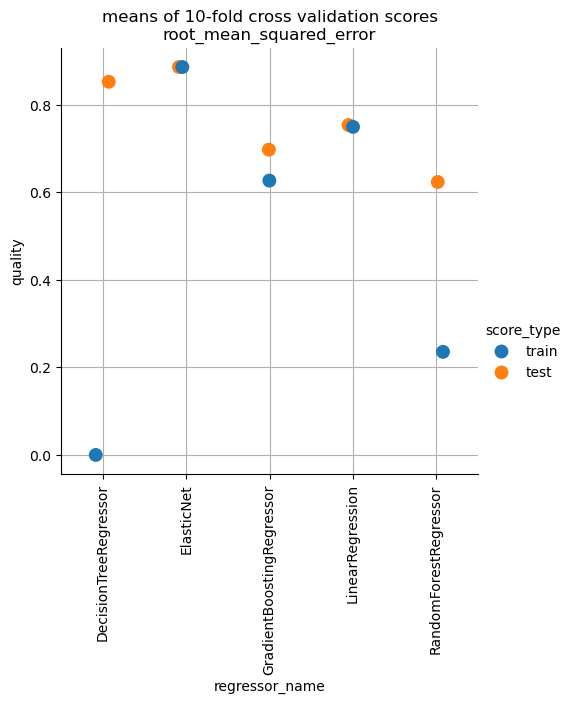

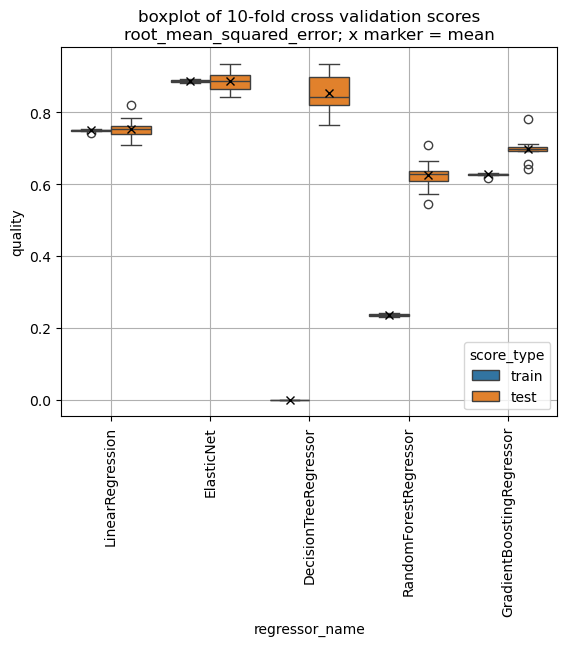

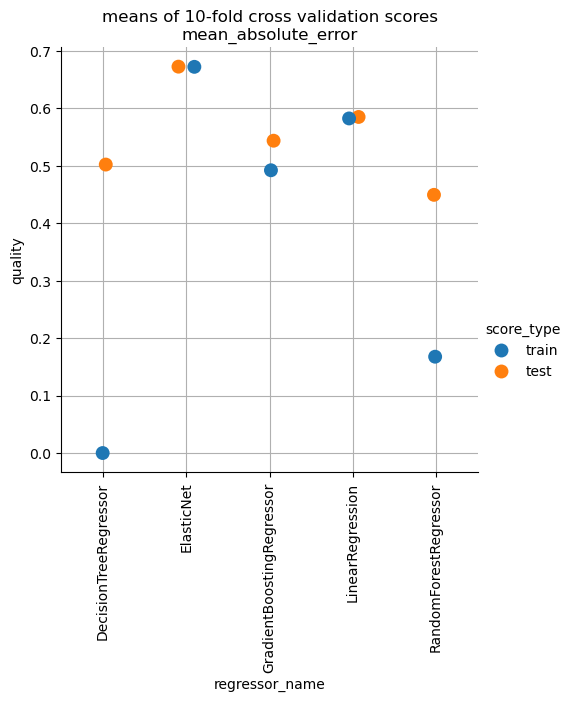

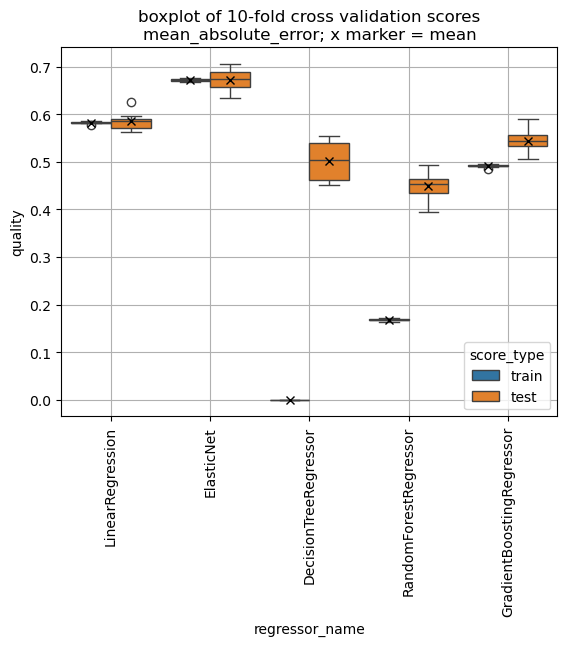

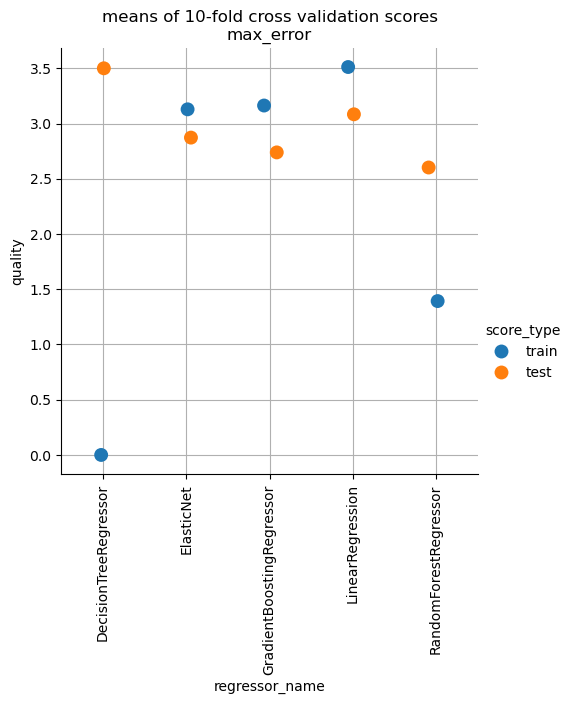

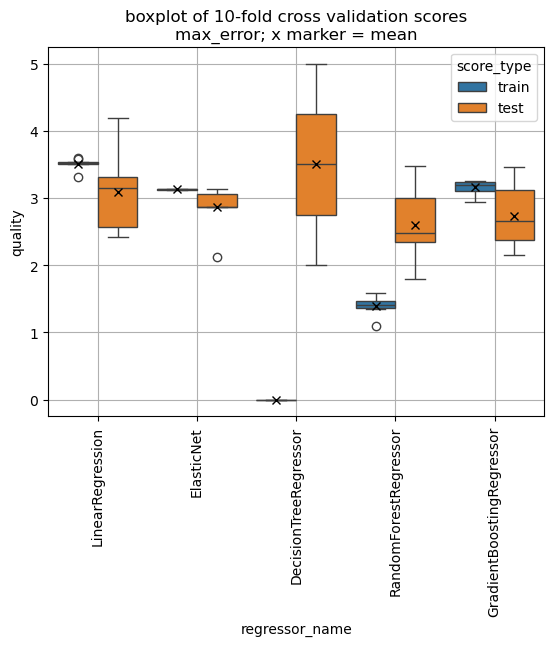

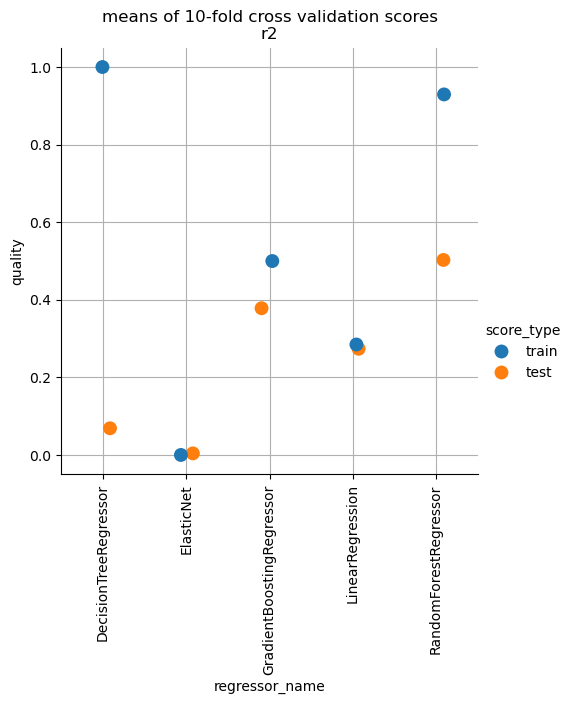

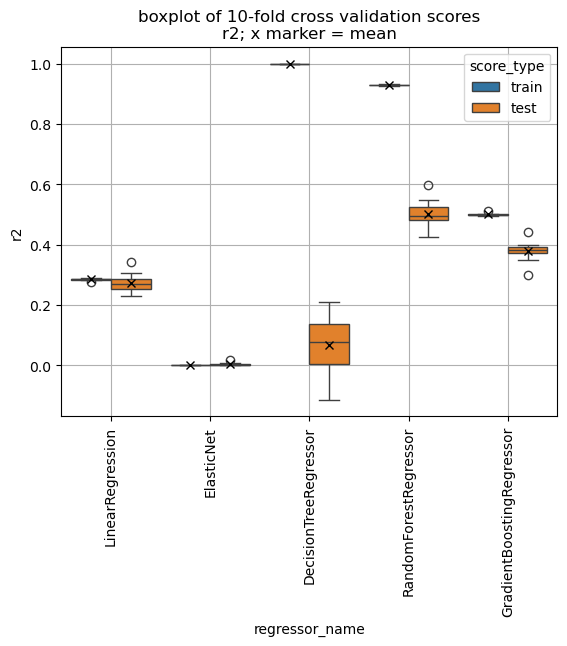

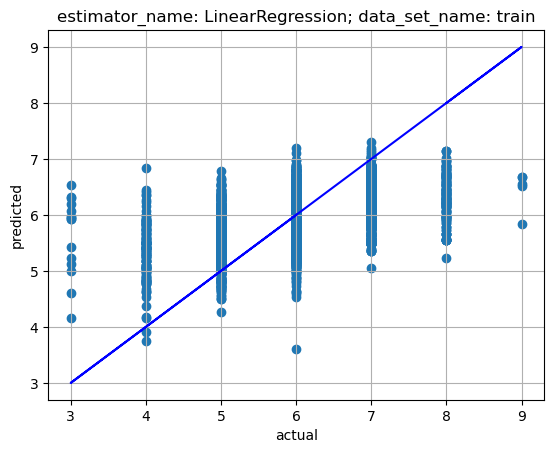

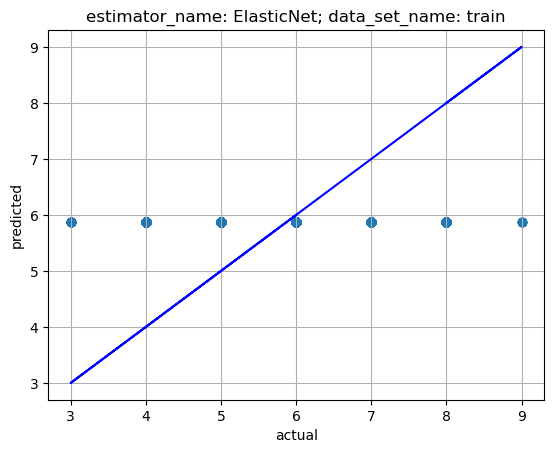

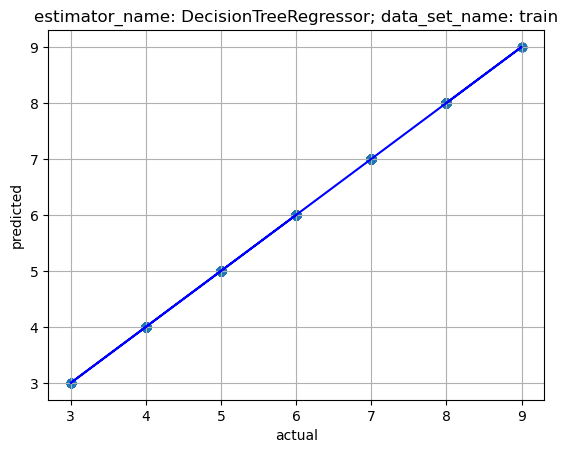

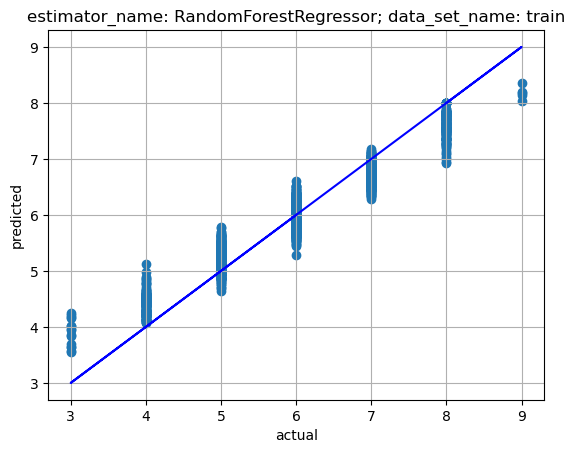

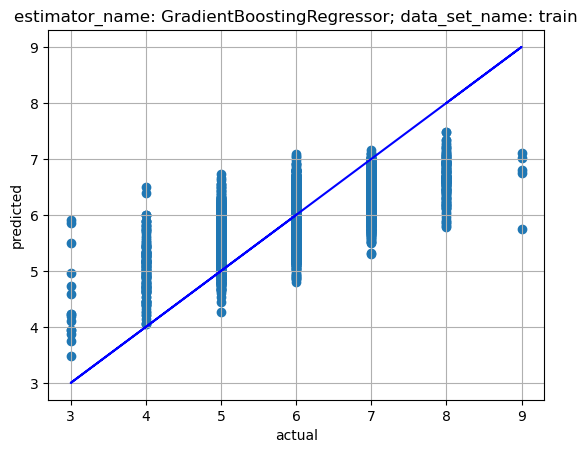

In [28]:
# get the maximal control k-fold cross validation splitter
splitter = KFold(n_splits=kfold_n_splits, 
                 shuffle=kfold_shuffle, 
                 random_state=kfold_random_state
)

# perform cross validation on models
sml_utils.model_survey_cross_val_and_analysis(preprocessor, estimator_dict, train_cap_x_df, train_y_df, scoring, splitter, target_attr, trained_estimator_dict, **kwargs)

## 11. Shortlisting default models